Ini adalah notebook untuk melakukan **Data Preprocessing**

# Reading Data

In [2]:
# Melakukan koneksi dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengimport library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Untuk pemodelan machine learning pada project ini, tim data science polandia memutuskan untuk menggunakan dataset "transaction" dan  "clickstream", yang mana masing-masing dataset dianggap mewakili aktivitas transaksi dan penggunaan aplikasi bagi customer Fashion Campus.

In [5]:
# Membaca data transaksi
transaction = pd.read_csv('/content/drive/MyDrive/MBKM/Mockup Datasets/transactions.csv')
transaction.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [6]:
# Membaca data clickstream
clickstream = pd.read_csv('/content/drive/MyDrive/MBKM/Mockup Datasets/click_stream.csv')
clickstream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


# Data Preparation

##Handling Missing Value

In [7]:
info = [transaction, clickstream]

for i in info:
    print(i.isna().sum())

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64
session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64


Terdapat missing value di tabel transaction, yaitu di kolom promo_code, dan di tabel clickstream di kolom event_metadata

In [8]:
# Missing Value pada kolom promo_code di tabel transaction diisi dengan "without code promo"
transaction['promo_code'].fillna(value = 'without code promo', axis = 0, inplace = True)

In [9]:
# Menghapus kolom event_metadata karena hampir seluruh informasi yang berada di kolom ini telah diwakilkan oleh kolom produk_metadata di tabel transaction
clickstream.drop(columns=['event_metadata'], inplace = True)

In [10]:
info = [transaction, clickstream]

for i in info:
    print(i.isna().sum())

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
dtype: int64
session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
dtype: int64


#Feature Engineering

## Feature Extraction

### Tabel transaction

Isi dari kolom produk_metadata pada tabel transaction berupa list, yang berisi informasi penting mengenai produk_id, quantity, dan item_price dari produk yang dibeli customer. Maka dari itu, list ini akan dipecah dan dibuatkan kolom baru.

In [11]:
import ast

transaction_2 = transaction.copy()
transaction_2['product_metadata'] = transaction_2['product_metadata'].apply(ast.literal_eval)
transaction_2['product_metadata'].iloc[9]

[{'product_id': 53051, 'quantity': 1, 'item_price': 292052},
 {'product_id': 46352, 'quantity': 1, 'item_price': 241945},
 {'product_id': 6352, 'quantity': 1, 'item_price': 297248},
 {'product_id': 26620, 'quantity': 1, 'item_price': 191138},
 {'product_id': 22849, 'quantity': 1, 'item_price': 78559},
 {'product_id': 56247, 'quantity': 1, 'item_price': 193870}]

In [12]:
transaction_2 = transaction_2.explode('product_metadata')
transaction_2[list(transaction_2['product_metadata'].head(1).tolist()[0].keys())] = transaction_2['product_metadata'].apply(
    lambda x: pd.Series([x[key] for key in x.keys()])
)

In [13]:
del transaction_2['product_metadata']

In [14]:
transaction_2.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,without code promo,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,without code promo,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,without code promo,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,without code promo,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


isi pada kolom created_at pada tabel transaction akan dipecah untuk mendapatkan detail waktu transaksi tersebut dibuat ke bentuk kolom-kolom baru untuk mempermudah mendapatkan informasi dan melakukan pengolahan data nantinya.

In [15]:
transaction_2['date_trans'] = pd.to_datetime(transaction_2['created_at']).dt.date
transaction_2['time_trans'] = pd.to_datetime(transaction_2['created_at']).dt.time

In [16]:
transaction_2['date_trans'] = pd.to_datetime(transaction_2['date_trans'],format='%Y-%m-%d')
transaction_2['year_trans'] = transaction_2['date_trans'].dt.year
transaction_2['month_trans'] = transaction_2['date_trans'].dt.month
transaction_2['day_trans'] = transaction_2['date_trans'].dt.day

In [17]:
transaction_2.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,shipment_location_long,total_amount,product_id,quantity,item_price,date_trans,time_trans,year_trans,month_trans,day_trans
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,111.969107,199832,54728,1,191247,2018-07-29,15:22:01.458193,2018,7,29
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,without code promo,10000,2018-08-03T01:29:03.415705Z,...,107.802514,155526,16193,1,145526,2018-07-30,12:40:22.365620,2018,7,30
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,without code promo,10000,2018-09-18T08:41:49.422380Z,...,115.743885,550696,53686,4,135174,2018-09-15,11:51:17.365620,2018,9,15
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,without code promo,0,2018-11-05T17:42:27.954235Z,...,120.363824,271012,20228,1,271012,2018-11-01,11:23:48.365620,2018,11,1
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,without code promo,0,2018-12-23T17:24:07.361785Z,...,120.363824,198753,55220,1,198753,2018-12-18,11:20:30.365620,2018,12,18


#### Membuat kolom Shipment Duration

ialah Durasi pengiriman dalam satu kali transaksi. Menggunakan tabel transaction_2 dengan menghitung waktu selisih estimasi produk diterima (shipment_date_limit) dan tanggal dibuat transaksi (created_at).

In [18]:
transaction_2['date_shipment'] = pd.to_datetime(transaction_2['shipment_date_limit']).dt.date
transaction_2['date_shipment'] = pd.to_datetime(transaction_2['date_shipment'],format='%Y-%m-%d')

In [19]:
transaction_2['shipment_duration'] = (transaction_2['date_shipment'] - transaction_2['date_trans']).dt.days

In [20]:
transaction_2.head(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,product_id,quantity,item_price,date_trans,time_trans,year_trans,month_trans,day_trans,date_shipment,shipment_duration
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728,1,191247,2018-07-29,15:22:01.458193,2018,7,29,2018-08-03,5
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,without code promo,10000,2018-08-03T01:29:03.415705Z,...,16193,1,145526,2018-07-30,12:40:22.365620,2018,7,30,2018-08-03,4
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,without code promo,10000,2018-09-18T08:41:49.422380Z,...,53686,4,135174,2018-09-15,11:51:17.365620,2018,9,15,2018-09-18,3
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,without code promo,0,2018-11-05T17:42:27.954235Z,...,20228,1,271012,2018-11-01,11:23:48.365620,2018,11,1,2018-11-05,4
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,without code promo,0,2018-12-23T17:24:07.361785Z,...,55220,1,198753,2018-12-18,11:20:30.365620,2018,12,18,2018-12-23,5


### Tabel clickstream

Sama halnya pada tabel transaction, isi pada kolom event_date pada tabel clickstream akan dipecah untuk mendapatkan detail waktu aktivitas customer ke bentuk kolom-kolom baru untuk mempermudah mendapatkan informasi dan melakukan pengolahan data nantinya.

In [21]:
clickstream['event_date'] = pd.to_datetime(clickstream['event_time']).dt.date

In [22]:
clickstream['event_date']= pd.to_datetime(clickstream['event_date'],format='%Y-%m-%d')
clickstream['event_year'] = clickstream['event_date'].dt.year
clickstream['event_month'] = clickstream['event_date'].dt.month
clickstream['event_day'] = clickstream['event_date'].dt.day

In [ ]:
clickstream.head()

## Feature Selection

Untuk pemodelan kali ini, tim data science memutuskan untuk mengambil tahun terakhir (tahun 2022) dari data yang ada pada dataset yang dianggap sebagai keadaan terbaru dari kondisi Fashion Campus.

### Tabel transaction

In [ ]:
transaction22 = transaction_2[(transaction_2["year_trans"] == 2022)].reset_index(drop=True)

In [ ]:
transaction22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285704 entries, 0 to 285703
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   created_at              285704 non-null  object        
 1   customer_id             285704 non-null  int64         
 2   booking_id              285704 non-null  object        
 3   session_id              285704 non-null  object        
 4   payment_method          285704 non-null  object        
 5   payment_status          285704 non-null  object        
 6   promo_amount            285704 non-null  int64         
 7   promo_code              285704 non-null  object        
 8   shipment_fee            285704 non-null  int64         
 9   shipment_date_limit     285704 non-null  object        
 10  shipment_location_lat   285704 non-null  float64       
 11  shipment_location_long  285704 non-null  float64       
 12  total_amount            285704

In [ ]:
transaction22.drop(columns=['created_at','shipment_date_limit','shipment_location_lat', 'shipment_location_long', 'time_trans', 'year_trans', 'date_shipment'], inplace = True)

In [ ]:
transaction22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285704 entries, 0 to 285703
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   customer_id        285704 non-null  int64         
 1   booking_id         285704 non-null  object        
 2   session_id         285704 non-null  object        
 3   payment_method     285704 non-null  object        
 4   payment_status     285704 non-null  object        
 5   promo_amount       285704 non-null  int64         
 6   promo_code         285704 non-null  object        
 7   shipment_fee       285704 non-null  int64         
 8   total_amount       285704 non-null  int64         
 9   product_id         285704 non-null  int64         
 10  quantity           285704 non-null  int64         
 11  item_price         285704 non-null  int64         
 12  date_trans         285704 non-null  datetime64[ns]
 13  month_trans        285704 non-null  int64   

### Tabel clickstream

In [ ]:
clickstream22 = clickstream[(clickstream["event_year"] == 2022)].reset_index(drop=True)

In [ ]:
clickstream22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993271 entries, 0 to 2993270
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   event_name      object        
 2   event_time      object        
 3   event_id        object        
 4   traffic_source  object        
 5   event_date      datetime64[ns]
 6   event_year      int64         
 7   event_month     int64         
 8   event_day       int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 205.5+ MB


In [ ]:
clickstream22.drop(columns=['event_time'], inplace = True)

## Feature Creation

### Tabel transaction

#### Membuat kolom transaksi terakhir customer

In [ ]:
# Mencari transaksi terakhir customer
last_trans = transaction22.groupby(['customer_id'])['month_trans'].max().reset_index()
last_trans = last_trans.rename(columns = {'month_trans' : 'last_transaction_month'})

In [ ]:
# Menggabungkan hasil pencarian transaksi terakhir customer ke kolom transaksi
transaction22 = pd.merge(left=transaction22, right=last_trans, on='customer_id')

In [ ]:
import numpy as np
# Membuat kolom transaksi 1 bulan terakhir customer
transaction22['transaction_past_1month'] = np.where(transaction22['last_transaction_month'] >= 7, True, False)

In [ ]:
transaction22.head(3)

,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,date_trans,month_trans,day_trans,shipment_duration,last_transaction_month,transaction_past_1month
0,4774,0d1342a0-bac8-4837-bea6-4196033422a5,5d3d5de2-3a5a-42e9-8f8c-512346a4c031,Credit Card,Success,0,without code promo,5000,1078709,33212,3,357903,2022-01-19,1,19,2,6,False
1,4774,e9597c94-dd17-4a93-81d9-aae586182d87,514d9158-5020-4dd9-8ca0-22097c600b78,Debit Card,Success,7255,AZ2022,10000,311231,21995,1,308486,2022-03-07,3,7,3,6,False
2,4774,e82a1b9f-7a30-431b-af7d-8108f6aca0c9,7e644152-6798-4511-8c27-0648ebff6e17,Credit Card,Success,7079,LIBURDONG,10000,117133,51055,1,114212,2022-04-23,4,23,3,6,False


### Tabel clickstream

#### Membuat kolom aktivitas terakhir customer

In [ ]:
# Mencari aktivitas terakhir customer
last_event = clickstream22.groupby(['session_id'])['event_month'].max().reset_index()
last_event = last_event.rename(columns = {'event_month' : 'last_event_month'})

In [ ]:
# Menggabungkan hasil pencarian aktivitas terakhir customer ke kolom clickstream
clickstream22 = pd.merge(left=clickstream22, right=last_event, on='session_id')

In [ ]:
# Membuat kolom aktivitas 1 bulan terakhir customer
clickstream22['event_past_1month'] = np.where(clickstream22['last_event_month'] >= 7, True, False)

In [ ]:
clickstream22.head(3)

,session_id,event_name,event_id,traffic_source,event_date,event_year,event_month,event_day,last_event_month,event_past_1month
0,78ffedab-febf-4b5b-9362-044ac40afa68,HOMEPAGE,cbd1dc63-117e-480d-90f0-bab2ffb423b2,WEB,2022-01-02,2022,1,2,1,False
1,78ffedab-febf-4b5b-9362-044ac40afa68,ADD_TO_CART,ceb34dc1-9fac-4a1b-8815-5b75dfcc7f92,WEB,2022-01-03,2022,1,3,1,False
2,78ffedab-febf-4b5b-9362-044ac40afa68,BOOKING,99b5d63c-144e-4932-ab2c-cc8ccb3920eb,WEB,2022-01-05,2022,1,5,1,False


# Merging Data

## Menggabungkan data transaksi dan data clickstream

In [ ]:
df_try = transaction22.merge(clickstream22, how='left', on='session_id')

In [ ]:
df_try.shape

(4814069, 27)

In [ ]:
df_try.duplicated().sum()

0

In [ ]:
df_try.isna().sum()

customer_id                0
booking_id                 0
session_id                 0
payment_method             0
payment_status             0
promo_amount               0
promo_code                 0
shipment_fee               0
total_amount               0
product_id                 0
quantity                   0
item_price                 0
date_trans                 0
month_trans                0
day_trans                  0
shipment_duration          0
last_transaction_month     0
transaction_past_1month    0
event_name                 0
event_id                   0
traffic_source             0
event_date                 0
event_year                 0
event_month                0
event_day                  0
last_event_month           0
event_past_1month          0
dtype: int64

##Dividing Data

---


Membagi data untuk modeling dan testing. Data modelling (df_try) ialah data yang digunakan untuk melatih model. Data test (month_7) merupakan data tanpa label yang nantinya akan diprediksi oleh pemodelan machine learning yang dibuat.


Di ambil data bulan 7 dari dataset sebagai data test.

In [ ]:
#Data test
month7 = df_try[(df_try['month_trans'] == 7) & (df_try['event_month'] == 7)].reset_index(drop=True)

In [ ]:
#Data modelling
df_try = df_try[(df_try['month_trans'] < 7) & (df_try['event_month'] < 7)].reset_index(drop=True)

In [ ]:
month7.shape

(651779, 27)

## Churn Labeling

In [ ]:
df_try['month_trans'].value_counts()

5    751479
6    731202
4    722987
3    707945
2    610708
1    583316
Name: month_trans, dtype: int64

In [ ]:
df_try['event_month'].value_counts()

5    747653
4    716391
3    713880
6    666559
1    650118
2    613036
Name: event_month, dtype: int64

In [ ]:
df_try['is_churn'] = np.where((df_try['transaction_past_1month'] == False) & (df_try['event_past_1month'] == False), True, False)

In [ ]:
df_try.head(3)

,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,...,event_name,event_id,traffic_source,event_date,event_year,event_month,event_day,last_event_month,event_past_1month,is_churn
0,4774,0d1342a0-bac8-4837-bea6-4196033422a5,5d3d5de2-3a5a-42e9-8f8c-512346a4c031,Credit Card,Success,0,without code promo,5000,1078709,33212,...,HOMEPAGE,a5fa30ce-3b50-4f36-8533-56bcf86030b5,MOBILE,2022-01-18,2022,1,18,1,False,True
1,4774,0d1342a0-bac8-4837-bea6-4196033422a5,5d3d5de2-3a5a-42e9-8f8c-512346a4c031,Credit Card,Success,0,without code promo,5000,1078709,33212,...,ADD_TO_CART,1e47217b-1350-41fd-acc4-a45adbbb84e7,MOBILE,2022-01-19,2022,1,19,1,False,True
2,4774,0d1342a0-bac8-4837-bea6-4196033422a5,5d3d5de2-3a5a-42e9-8f8c-512346a4c031,Credit Card,Success,0,without code promo,5000,1078709,33212,...,BOOKING,d52e5c22-7d94-4949-bba7-36ce90b87733,MOBILE,2022-01-19,2022,1,19,1,False,True


In [ ]:
df = df_try.copy()

In [ ]:
df['is_churn'].value_counts()

False    2799737
True     1307900
Name: is_churn, dtype: int64

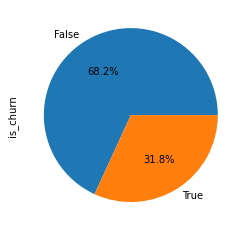

In [ ]:
df['is_churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df.columns

Index(['customer_id', 'booking_id', 'session_id', 'payment_method',
       'payment_status', 'promo_amount', 'promo_code', 'shipment_fee',
       'total_amount', 'product_id', 'quantity', 'item_price', 'date_trans',
       'month_trans', 'day_trans', 'shipment_duration',
       'last_transaction_month', 'transaction_past_1month', 'event_name',
       'event_id', 'traffic_source', 'event_date', 'event_year', 'event_month',
       'event_day', 'last_event_month', 'event_past_1month', 'is_churn'],
      dtype='object')

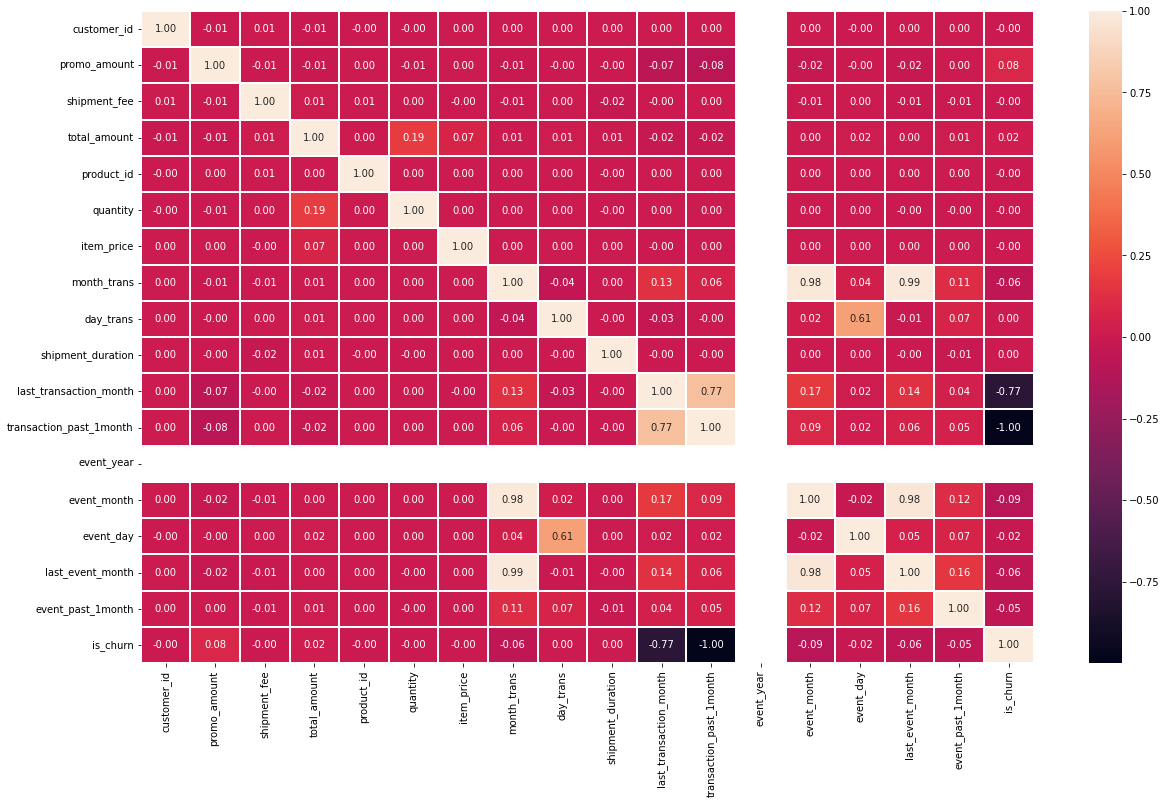

In [ ]:
plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
df.drop(columns=['customer_id', 'booking_id', 'session_id','date_trans','month_trans','day_trans','transaction_past_1month', 'event_id','event_date', 'event_year', 'event_month',
       'event_day','event_past_1month', 'last_event_month', 'last_transaction_month', 'transaction_past_1month', 'event_past_1month','product_id'], inplace = True)

In [ ]:
df.columns

Index(['payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'total_amount', 'quantity', 'item_price',
       'shipment_duration', 'event_name', 'traffic_source', 'is_churn'],
      dtype='object')

In [ ]:
# label encoding fitur churn
# no = 0 , yes = 1


from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['is_churn'] = le.fit_transform(df['is_churn'])

In [ ]:
encode = ['payment_method', 'payment_status', 'promo_code', 'event_name', 'traffic_source']

In [ ]:
df[encode] = df[encode].apply(le.fit_transform)

In [ ]:
df.head()

,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,quantity,item_price,shipment_duration,event_name,traffic_source,is_churn
0,0,1,0,8,5000,1078709,3,357903,2,4,0,1
1,0,1,0,8,5000,1078709,3,357903,2,1,0,1
2,0,1,0,8,5000,1078709,3,357903,2,2,0,1
3,0,1,0,8,5000,1078709,3,357903,2,8,0,1
4,1,1,7255,0,10000,311231,1,308486,3,4,0,1


# Exporting data

## Data Train

In [ ]:
#Data train yang sudah diencode
df.to_csv('df_encode.csv', index=False)
!cp df_encode.csv "drive/My Drive/Data Polandia/"

In [ ]:
#Data train yang belum diencode
df_try.to_csv('df_try.csv', index=False)
!cp df_try.csv "drive/My Drive/Data Polandia/"

## Data Test

In [ ]:
month7.drop(columns=['customer_id', 'booking_id', 'session_id','date_trans','month_trans','day_trans','transaction_past_1month', 'event_id','event_date', 'event_year', 'event_month',
       'event_day','event_past_1month', 'last_event_month', 'last_transaction_month', 'transaction_past_1month', 'event_past_1month','product_id'], inplace = True)

In [ ]:
month7.head()

,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,quantity,item_price,shipment_duration,event_name,traffic_source
0,OVO,Success,9376,BUYMORE,10000,171940,1,171316,4,ADD_TO_CART,MOBILE
1,OVO,Success,9376,BUYMORE,10000,171940,1,171316,4,ADD_PROMO,MOBILE
2,OVO,Success,9376,BUYMORE,10000,171940,1,171316,4,BOOKING,MOBILE
3,OVO,Success,9376,BUYMORE,10000,171940,1,171316,4,PROMO_PAGE,MOBILE
4,OVO,Success,9376,BUYMORE,10000,171940,1,171316,4,ITEM_DETAIL,MOBILE


In [ ]:
month7.shape

(651779, 11)

In [ ]:
#Data test yang belum diencode
month7.to_csv('month7.csv', index=False)
!cp month7.csv "drive/My Drive/Data Polandia/"

In [ ]:
month7[encode] = month7[encode].apply(le.fit_transform)

In [ ]:
month7.sample(3)

,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,quantity,item_price,shipment_duration,event_name,traffic_source
142619,4,1,0,8,50000,331945,1,281945,2,4,0
61759,0,1,0,8,10000,510966,1,90714,4,3,0
215206,0,1,0,8,10000,458491,1,448491,3,7,0


In [ ]:
#Data test yang sudah diencode
month7.to_csv('month7_encoded.csv', index=False)
!cp month7_encoded.csv "drive/My Drive/Data Polandia/"